In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Loading Dataset

In [3]:
df = pd.read_excel("Height-Width.xlsx")
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


# Data Analysis

In [4]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [5]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Visualization

Text(0, 0.5, 'Weight')

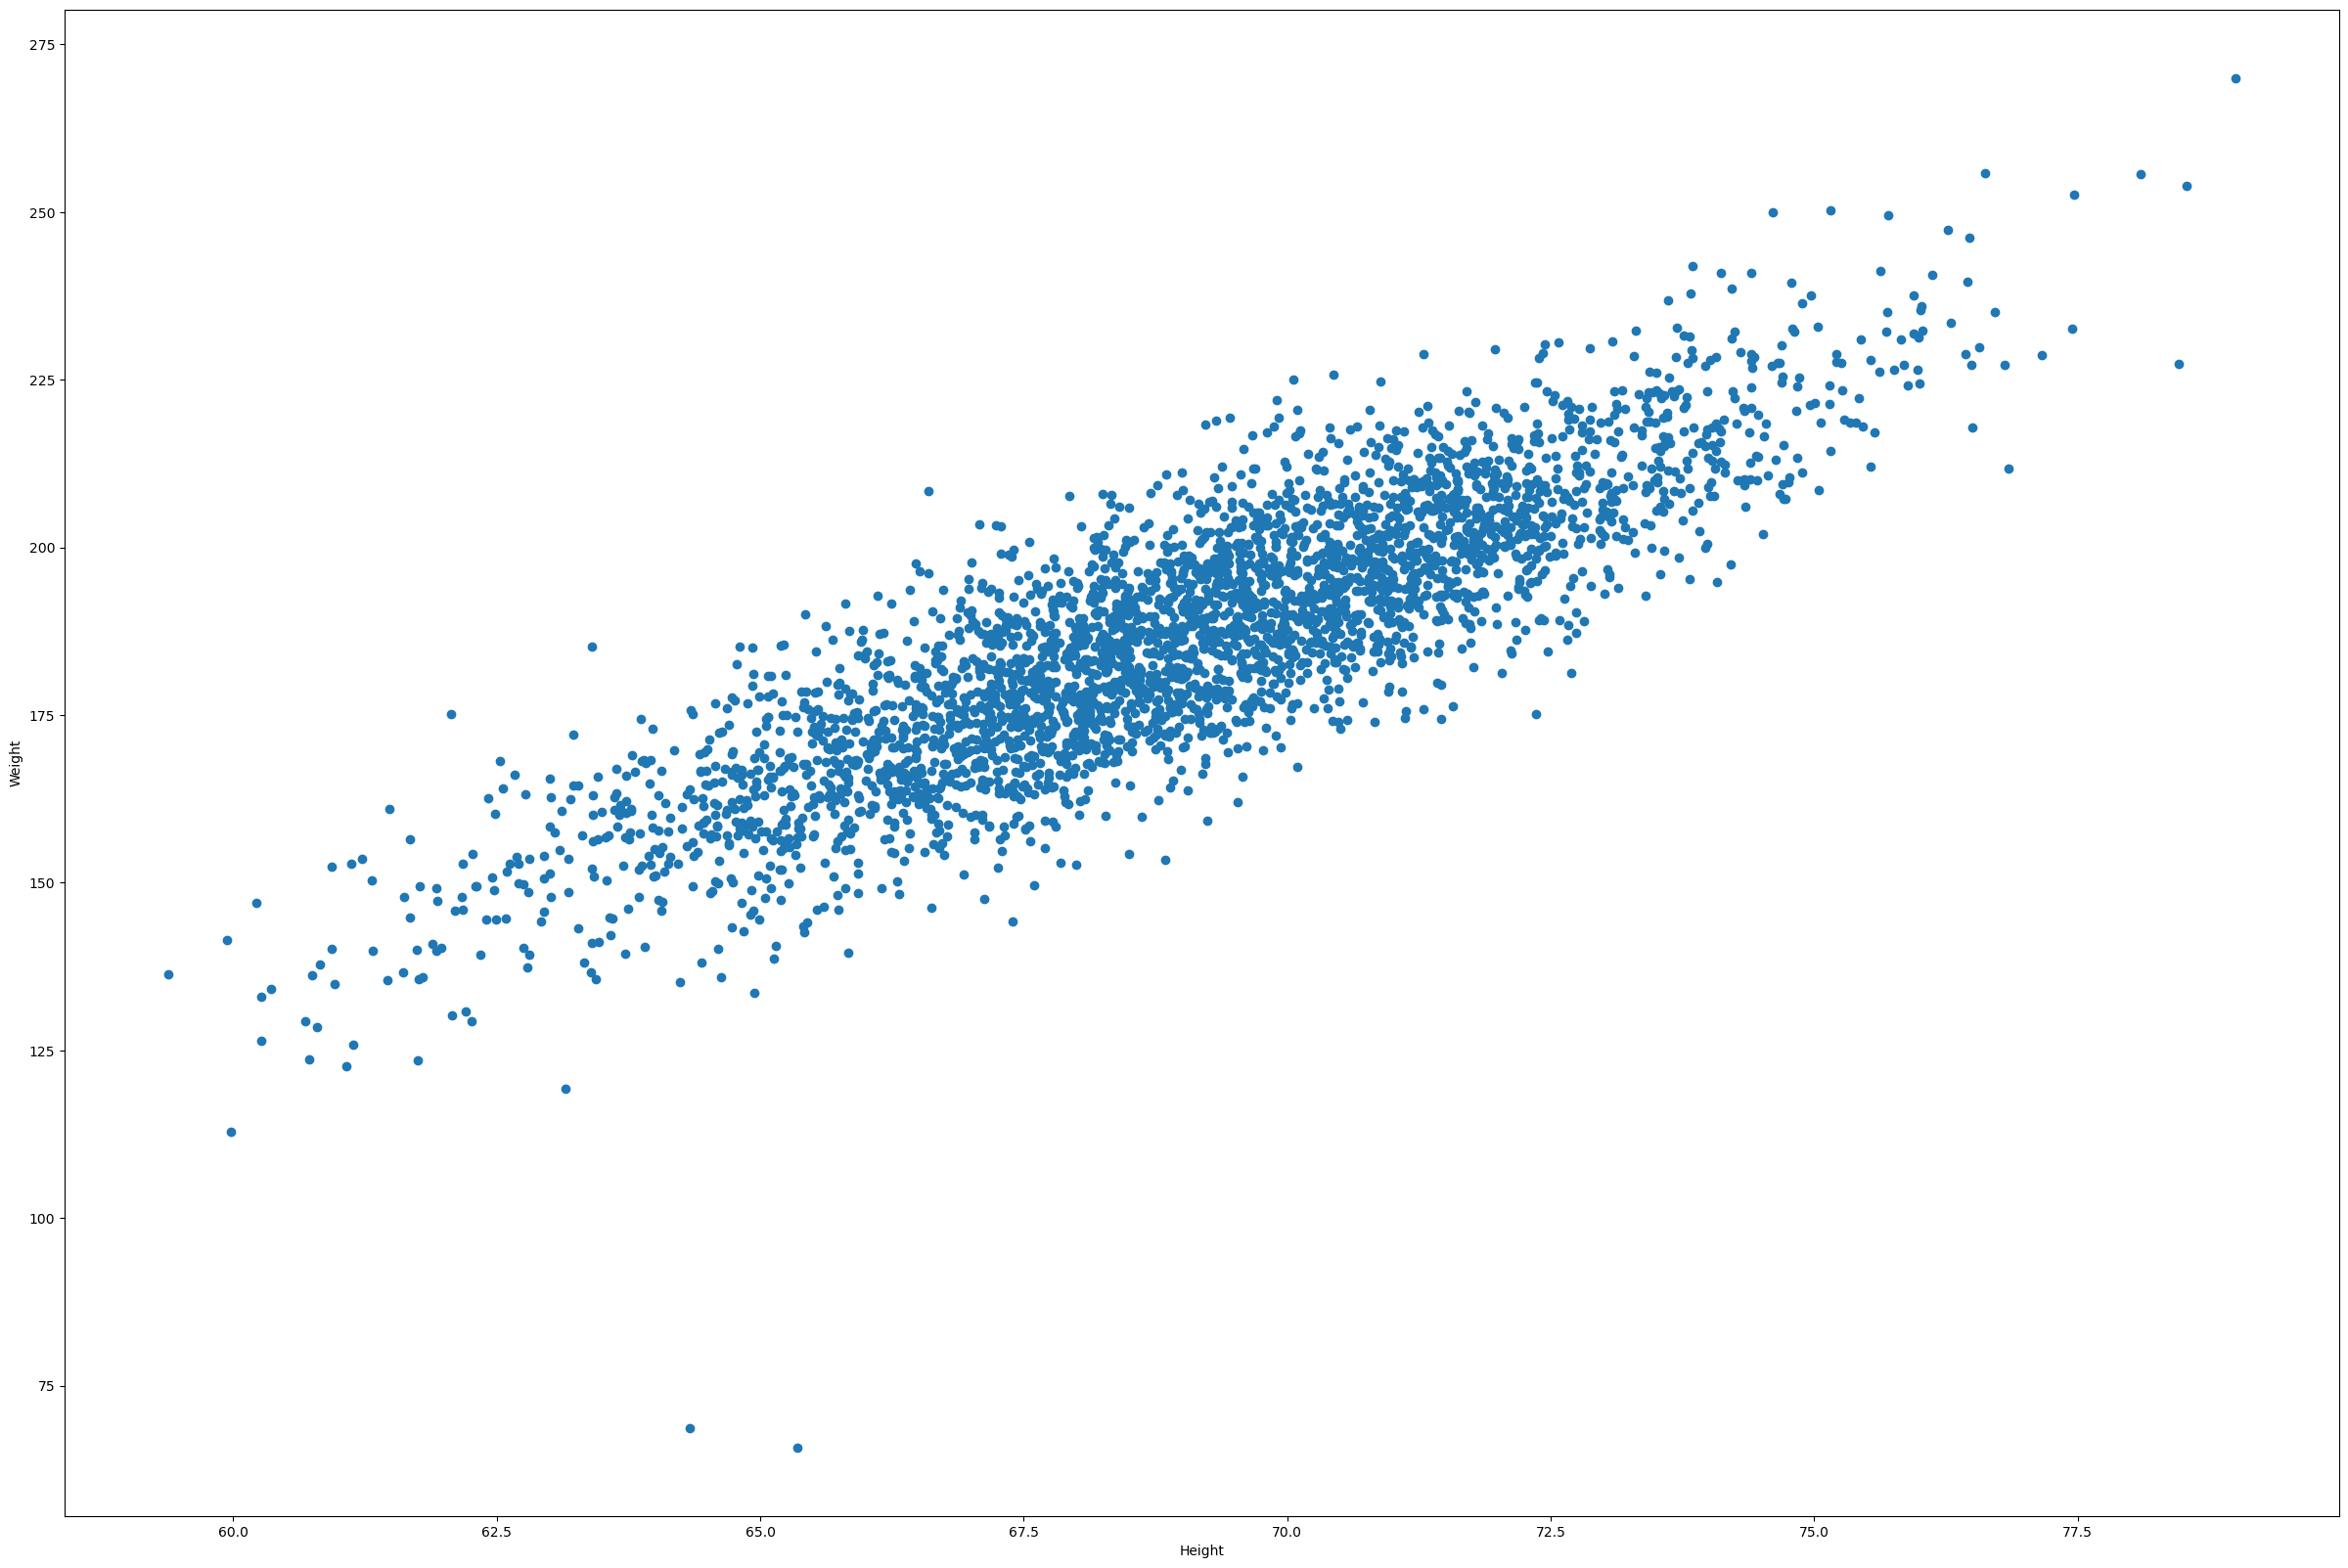

In [6]:
plt.figure(figsize=(30,20))
plt.scatter(df.Height, df.Weight)
plt.xlabel("Height")
plt.ylabel("Weight")

In [7]:
x=df[["Height"]]
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [8]:
y = df["Weight"]
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split as tts

In [36]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.3,random_state=45)

In [37]:
xtrain

,Height
2257,69.346474
276,62.600248
1418,68.697461
1550,67.396020
2510,69.326189
...,...
607,70.051255
1916,73.608365
1667,69.566622
2462,68.253487


In [38]:
xtest

,Height
1971,67.671414
1750,74.604668
2564,70.171479
3114,71.954680
176,67.599424
...,...
886,71.765562
287,69.157729
284,66.615624
2143,70.672911


In [39]:
ytrain

2257    181.851584
276     151.720704
1418    178.015095
1550    180.659638
2510    177.363588
           ...    
607     207.194647
1916    220.033778
1667    187.468987
2462    179.252156
3019    169.409645
Name: Weight, Length: 2450, dtype: float64

In [40]:
ytest

1971    174.724534
1750    249.946283
2564    192.347836
3114    207.693089
176     177.766426
           ...    
886     192.690383
287     195.895257
284     160.991990
2143    185.759884
2714    186.922284
Name: Weight, Length: 1051, dtype: float64

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()

In [43]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [44]:
m = reg.coef_
m

array([5.89957787])

In [45]:
c = reg.intercept_
c

-220.18715695214914

In [47]:
y = m*70.171479+c
y

array([193.79494742])

In [48]:
reg.predict([[70.171479]])

/home/dipto/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([193.79494742])

In [50]:
pred = reg.predict(xtest)
pred

array([179.04561662, 219.94889141, 193.79494594, ..., 172.81690626,
       196.7531826 , 194.4356857 ])

In [51]:
df["Predicted Result"] = reg.predict(x)
df

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.479070
1,68.781904,162.310473,185.597042
2,74.110105,212.740856,217.031180
3,71.730978,220.042470,202.995336
4,69.881796,206.349801,192.085939
...,...,...,...
3496,69.296830,185.649086,188.634887
3497,70.542201,210.198845,195.982053
3498,73.912549,202.429960,215.865682
3499,67.396021,144.277671,177.420916


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
mse = mean_squared_error(ytest, pred)

In [55]:
mse

114.34471379972085

In [56]:
mae = mean_absolute_error(ytest, pred)
mae

8.033241997174171


# Best fit line

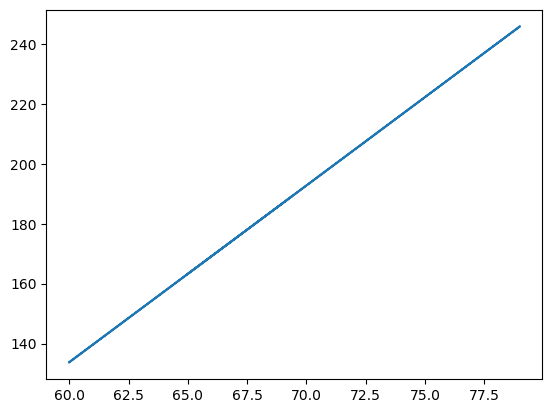

In [57]:
plt.plot(xtrain, reg.predict(xtrain))

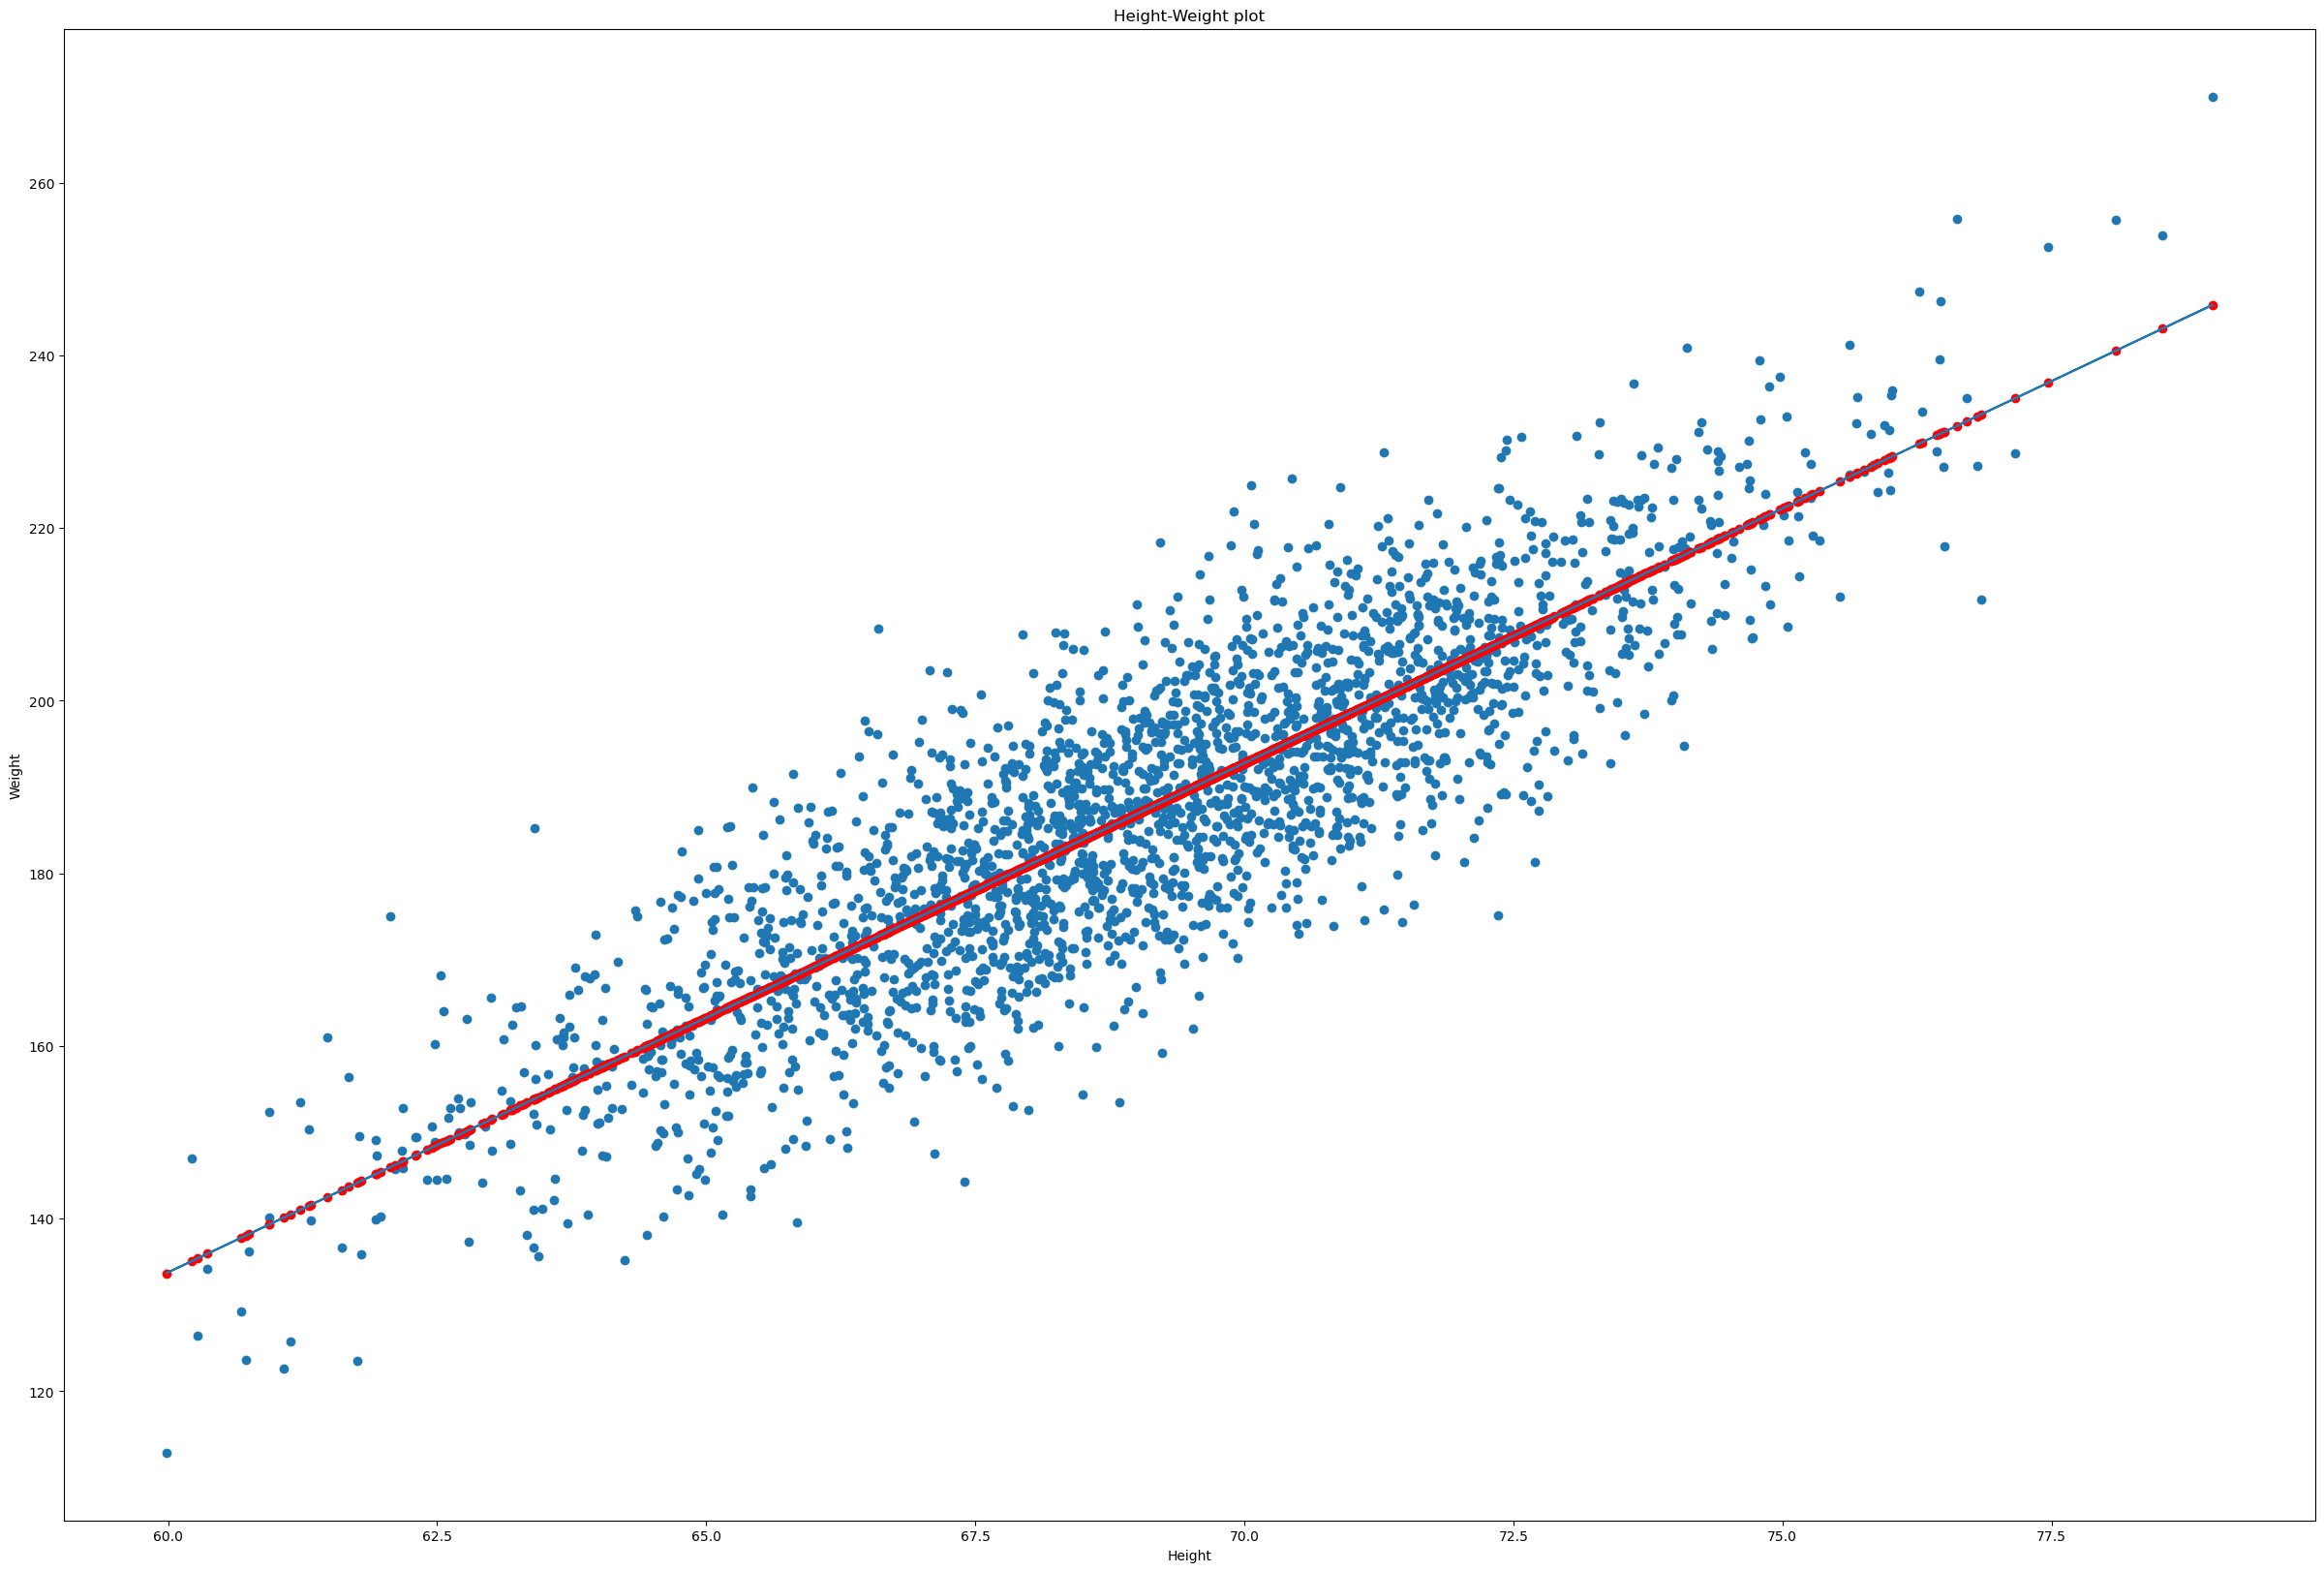

In [64]:
plt.figure(figsize=(30,20))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain, reg.predict(xtrain))
plt.scatter(xtrain, reg.predict(xtrain), color="Red")

In [65]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.7285757231751437